### MATH 123 - Mathematical Aspects of Data Analysis, Homework 2

The purpose is to walk-through using PCA to analyze the MNIST handwritten digits data set. We explore the differences between the use of PCA and Kernel PCA, the strengths and weaknesses, as well as how each method performs on separating the datasets into smaller principal components.

### Loading the MNIST dataset

The MNIST dataset contains 10 classes representing the digits (0-9)

Link: https://keras.io/api/datasets/mnist/

In [2]:
# Load the MNIST Dataset
from keras.datasets import mnist
import pandas as pd
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Shape of training images:", x_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of testing images:", x_test.shape)
print("Shape of testing labels:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of testing images: (10000, 28, 28)
Shape of testing labels: (10000,)


#### Part B: Load the images into a data matrix

In [20]:
import numpy as np

# Reshape training data
x_train = x_train.reshape(x_train.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)

# Build data matrix by np.vstack function
X = np.vstack(x_train)
print(X.shape)


(60000, 784)


#### Part C: Normalization

In [4]:
X = X.astype('float32') / 255 # Change scaling to [0, 1]

print(X)

# Load into a vector y
y = y_train
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[5]
 [0]
 [4]
 ...
 [5]
 [6]
 [8]]


#### Plotting the data

In [5]:
# Part D: Mask Creation

# Filter the labels 0, 2 and 4 from the dataset
mask_labels = [1, 3, 5, 6, 7, 8, 9]

# Create a boolean mask based on the labels
mask = np.isin(y.flatten(), mask_labels)

print(mask)

# Modify the dataset appropriately.
y_filtered = y[mask]
X_filtered = X[mask, :] # Get filtered rows, get all columns for image data.

print("Shape of filtered images:", X_filtered.shape)
print("Shape of filtered labels:", y_filtered.shape)


[ True False False ...  True  True  True]
Shape of filtered images: (42277, 784)
Shape of filtered labels: (42277, 1)


In [6]:
# Part E: Subsample 5000 datapoints.

# Generate random indices
num_samples = 5000
random_indices = np.random.choice(X_filtered.shape[0], size=num_samples, replace=False)

# Subsample X_filtered using the random indices
X_filtered_sample = X_filtered[random_indices, :]

print(X_filtered_sample.shape)

y_filtered_sample = y_filtered[random_indices]
print(y_filtered_sample)

(5000, 784)
[[1]
 [6]
 [9]
 ...
 [7]
 [6]
 [3]]


Explained variance ratio: [0.09529466 0.08273023]


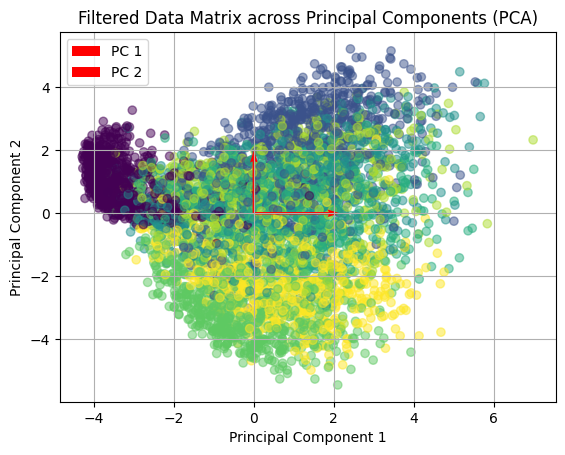

In [7]:
# Part F: Use PCA to return the first two principal components
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig, ax = plt.subplots()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filtered_sample)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# Create a scatter plot of the PCA results
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_filtered_sample.flatten(), cmap='viridis', alpha=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Filtered Data Matrix across Principal Components (PCA)')
ax.legend(*scatter.legend_elements(), title="Digits")
ax.grid(True)

# Plot the principal components as vectors from the origin
# The vectors should represent the direction and magnitude of the principal components in the 2D space
# We can scale them by the square root of the explained variance (standard deviation)
std_dev = np.sqrt(pca.explained_variance_)

# Plot the first principal component vector
ax.quiver(0, 0, std_dev[0], 0, angles='xy', scale_units='xy', scale=1, color='r', width=0.005, label='PC 1')
# Plot the second principal component vector
ax.quiver(0, 0, 0, std_dev[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.005, label='PC 2')

# Add legend for the principal components
ax.legend()
plt.show()

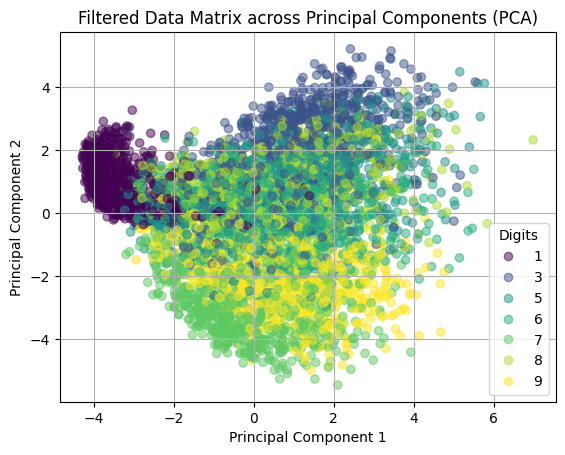

"\nFrom the scatterplot, it's very difficult to distinguish between the different \nclusters of data points when it's projected onto 2 principal components. The \nlack of linearity, the fact that there are more classes of clusters than there \nare principal components results in PCA being irrelevant to reduce the \ndimensionality of the data.\n"

In [8]:
# Part G: Scatter plot the projected data. Observations.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filtered_sample)

fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_filtered_sample.flatten(), cmap='viridis', alpha=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Filtered Data Matrix across Principal Components (PCA)')
ax.legend(*scatter.legend_elements(), title="Digits")
ax.grid(True)
plt.show()


#### Observation.

'''
From the scatterplot, it's very difficult to distinguish between the different
clusters of data points when it's projected onto 2 principal components. The
lack of linearity, the fact that there are more classes of clusters than there
are principal components results in PCA being irrelevant to reduce the
dimensionality of the data.
'''

In [9]:
# Part H: Different Combinations of Numbers.
from itertools import combinations # https://www.geeksforgeeks.org/python/python-all-possible-pairs-in-list/

# Filter the labels 0, 2 and 4 from the dataset
mask_labels = [1, 3, 5, 6, 7, 8, 9]
results = list(combinations(mask_labels, 2))

print(results)

# Go through each pair of classes, check separation.
for pair in results:
    mask = np.isin(y_filtered_sample.flatten(), pair)

    # Modify the dataset appropriately.
    y_filtered = y_filtered_sample[mask]
    X_filtered = X_filtered_sample[mask, :] # Get filtered rows, get all columns for image data.

    print("Shape of filtered images:", X_filtered.shape)
    print("Shape of filtered labels:", y_filtered.shape)

    fig, ax = plt.subplots()

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_filtered)

    print("Explained variance ratio:", pca.explained_variance_ratio_)

    # Create a scatter plot of the PCA results
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_filtered.flatten(), cmap='viridis', alpha=0.5)

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title(f'Filtered Data Matrix across Principal Components (PCA) with ({pair[0]}, {pair[1]})')
    ax.legend(*scatter.legend_elements(), title="Digits")
    ax.grid(True)

    std_dev = np.sqrt(pca.explained_variance_)

    # ax.quiver is used to plot the principal component vectors of our data.
    # Plot the first principal component vector
    ax.quiver(0, 0, std_dev[0], 0, angles='xy', scale_units='xy', scale=1, color='r', width=0.005, label='PC 1')
    # Plot the second principal component vector
    ax.quiver(0, 0, 0, std_dev[1], angles='xy', scale_units='xy', scale=1, color='r', width=0.005, label='PC 2')

    plt.show()



Output hidden; open in https://colab.research.google.com to view.

[-3.7244797e-06 -6.8044663e-08 -1.3777387e-05]


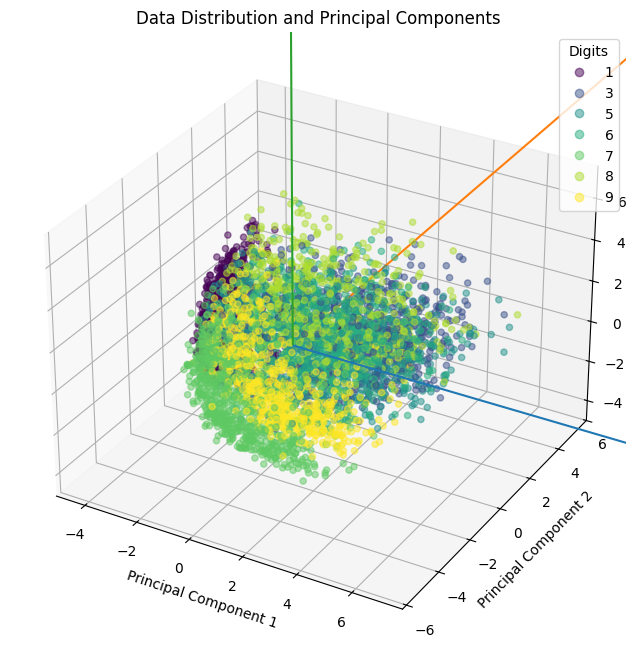

'\nAdding the third principal component helps to separate all the images whose digit \nclass is 1, but it fails to separate the remaining data points with the other\ndigit class as a result of the non-linearity of the data.\n'

In [10]:
# Part I: Add a third principal component.
from numpy.linalg import svd

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_filtered_sample)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_filtered_sample.flatten(), cmap='viridis', alpha=0.5)

mean_points = np.mean(X_pca, axis=0)
print(mean_points)

U, S, VT = svd(X_pca)

# Plot the scaled singular vectors (principal components)
# The singular vectors are the columns of VT (or rows of V) from SVD of the data matrix
# Scale the singular vectors by the singular values (S)
for i in range(VT.shape[0]):
    # Principal components are the rows of VT
    vector = VT[i, :] * S[i]
    ax.quiver(mean_points[0], mean_points[1], mean_points[2],
              vector[0], vector[1], vector[2], color=f'C{i}', label=f'Principal Component {i+1}')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Data Distribution and Principal Components')
ax.legend(*scatter.legend_elements(), title="Digits")
plt.show()


### Observation:

'''
Adding the third principal component helps to separate all the images whose digit
class is 1, but it fails to separate the remaining data points with the other
digit class as a result of the non-linearity of the data.
'''


#### Part J

For examples G, H, and I, report the total amount of variance of X
is captured by the projection onto the PCs.


In [11]:
# Example G
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filtered_sample)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.09529451 0.08273007]


In [12]:
# Example H

# Filter the labels 0, 2 and 4 from the dataset
mask_labels = [1, 3, 5, 6, 7, 8, 9]
results = list(combinations(mask_labels, 2))

print(results)

# Go through each pair of classes, check separation.
for pair in results:
    print(f"Current Pair: ({pair[0]}, {pair[1]})")
    mask = np.isin(y_filtered_sample.flatten(), pair)

    # Modify the dataset appropriately.
    y_filtered = y_filtered_sample[mask]
    X_filtered = X_filtered_sample[mask, :] # Get filtered rows, get all columns for image data.

    print("Shape of filtered images:", X_filtered.shape)
    print("Shape of filtered labels:", y_filtered.shape)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_filtered)

    print("Explained variance ratio:", pca.explained_variance_ratio_)

[(1, 3), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
Current Pair: (1, 3)
Shape of filtered images: (1566, 784)
Shape of filtered labels: (1566, 1)
Explained variance ratio: [0.20297202 0.11542965]
Current Pair: (1, 5)
Shape of filtered images: (1453, 784)
Shape of filtered labels: (1453, 1)
Explained variance ratio: [0.19146323 0.1105615 ]
Current Pair: (1, 6)
Shape of filtered images: (1503, 784)
Shape of filtered labels: (1503, 1)
Explained variance ratio: [0.24077167 0.11037572]
Current Pair: (1, 7)
Shape of filtered images: (1538, 784)
Shape of filtered labels: (1538, 1)
Explained variance ratio: [0.24122128 0.12240931]
Current Pair: (1, 8)
Shape of filtered images: (1483, 784)
Shape of filtered labels: (1483, 1)
Explained variance ratio: [0.20072661 0.11526006]
Current Pair: (1, 9)
Shape of filtered images: (1472, 784)
Shape of filtered labels: (1472, 1)
Explained v

In [13]:
# Example I
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_filtered_sample)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.09529459 0.0827302  0.06400868]


#### Part K: How many principal components do you need to capture 90% of the total variance?

Link for help: https://youtu.be/8klqIM9UvAc?si=BOlhIwOlzD2lPWmd

In [14]:
pca = PCA(.90)
print(pca.fit_transform(X_filtered_sample).shape)

(5000, 84)


To capture 90% of the variance of the image data, we need 85 principal components to do so.

### Problem 2

In [15]:
# Filter dataset using problem 1, part D

mask_labels = [1, 3, 5, 6, 7, 8, 9]
mask = np.isin(y.flatten(), mask_labels)

# Modify the dataset appropriately.
y_filtered = y[mask]
X_filtered = X[mask, :] # Get filtered rows, get all columns for image data

print(X_filtered.shape)
print(y_filtered.shape)

(42277, 784)
(42277, 1)


In [16]:
# Kernel PCA with Increased Bandwidth, Part A
from sklearn.decomposition import KernelPCA

def plot_kernel_pca(X, n, kernel, gamma):
  kpca = KernelPCA(n_components=2, kernel=kernel, gamma=gamma)

  fig, ax = plt.subplots()

  # Generate random indices
  random_indices = np.random.choice(X_filtered.shape[0], size=n, replace=False)

  # Subsample X and y based on number of random points.
  X_filtered_sample = X_filtered[random_indices, :]
  y_filtered_sample = y_filtered[random_indices]

  # Fit the data points
  X_pca = pca.fit_transform(X_filtered_sample)

  # Create a scatter plot of the PCA results
  scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_filtered_sample.flatten(), cmap='viridis', alpha=0.5)

  ax.set_xlabel('Principal Component 1')
  ax.set_ylabel('Principal Component 2')
  ax.set_title(f'Data on 2 PCs with kernel={kernel} with gamma={gamma}')
  ax.legend(*scatter.legend_elements(), title="Digits")
  ax.grid(True)


  plt.show()


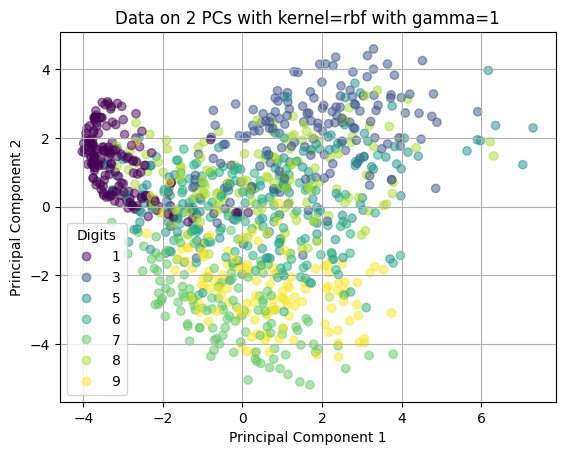

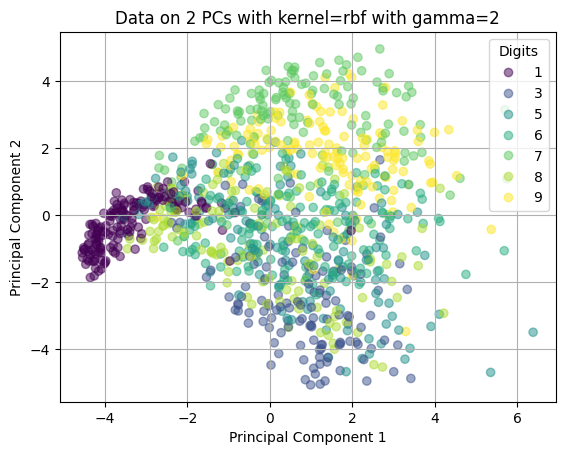

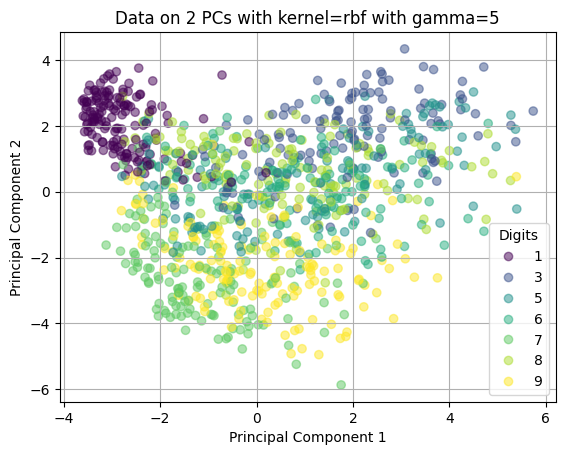

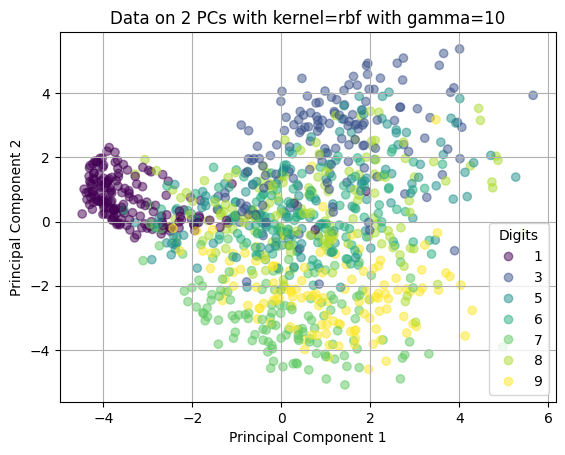

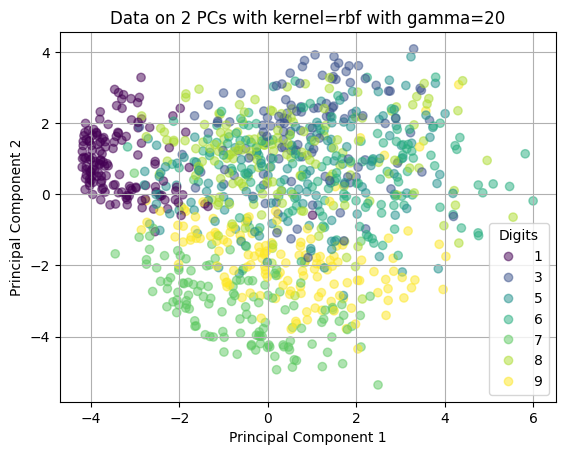

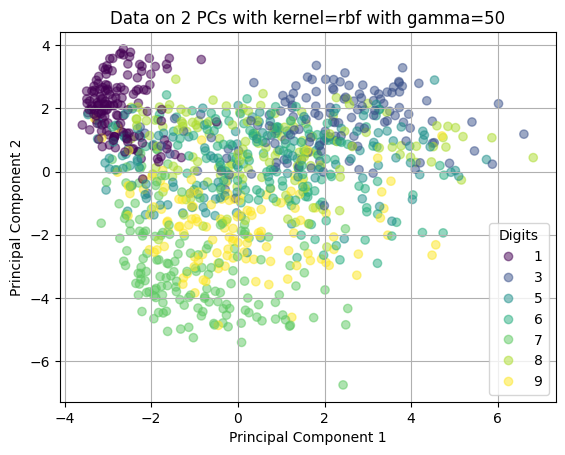

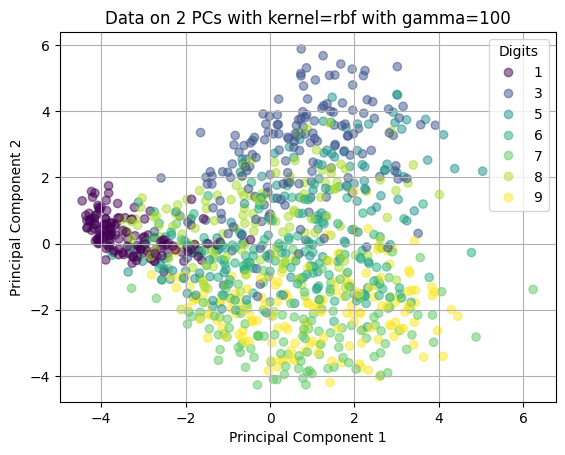

In [17]:
'''
Observation: As the bandwidth of the kernel increases, the spread of the data
is more compact. This results in complex decision boundaries where the clusters
with the exception of the cluster focused on digit 1 are difficult to classify.
With cluster 1, as gamma increases the decision boundary is inconsistently positioned
on the principal component axes For the other clusters, we can see that the other digit
clusters are more compact and consistently positioned based on the decision boundary.
'''

n=1000
bandwidths = [1, 2, 5, 10, 20, 50, 100]
for bandwidth in bandwidths:
  plot_kernel_pca(X_filtered, n, 'rbf', bandwidth)


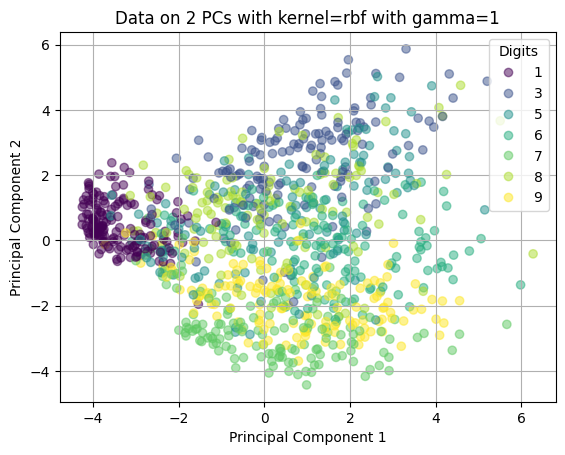

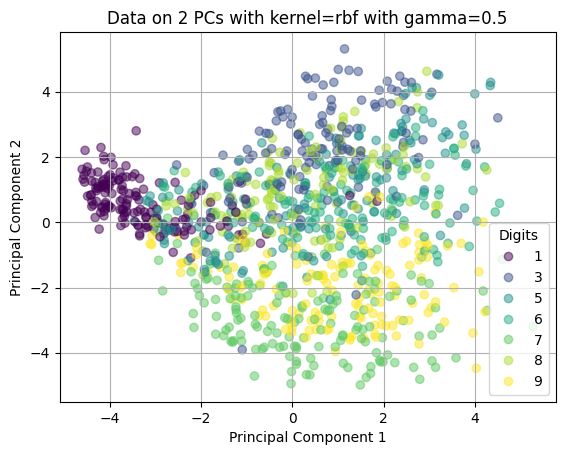

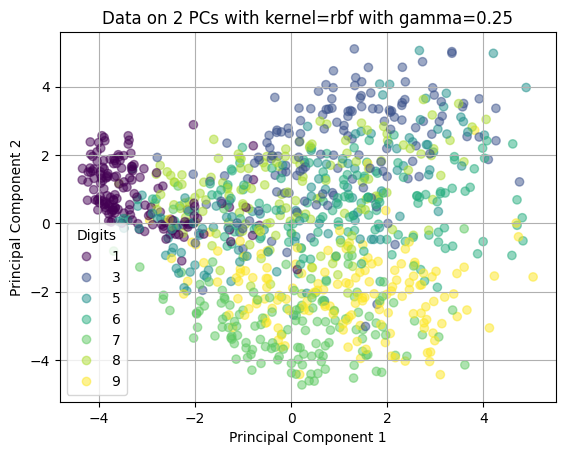

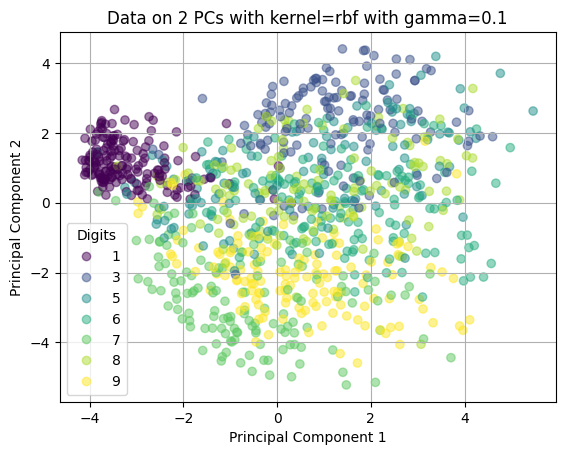

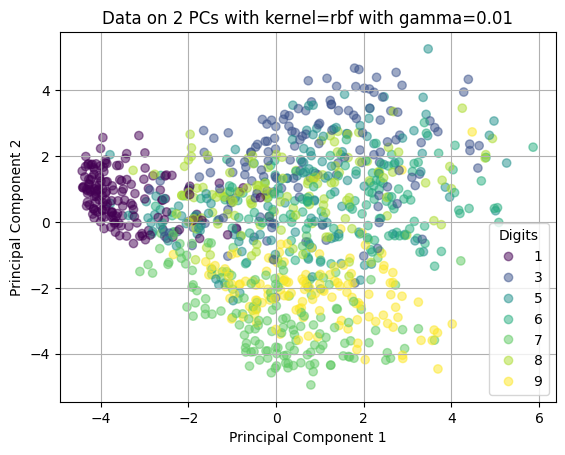

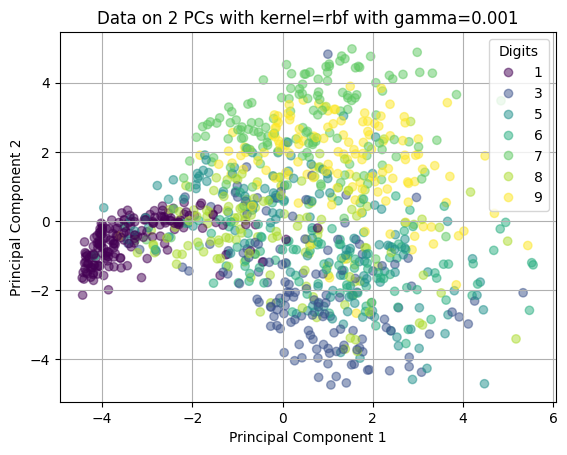

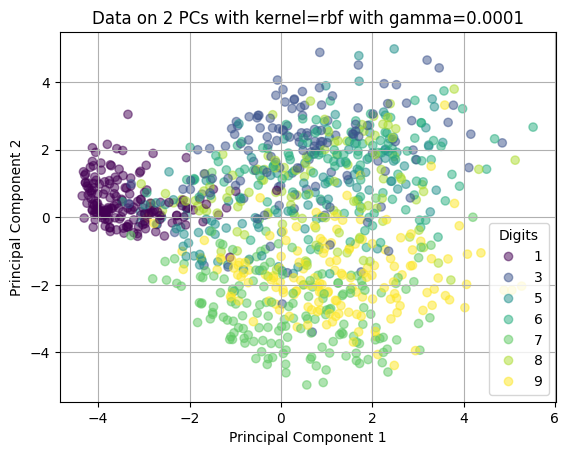

In [18]:
'''
Observation: As the bandwidth of the kernel decreases, the more significant that
outliers of the data clusters play with the position of the decision boundary.
This means that there's no consistency as to where the decision boundary should
be across different digits with decreasing gamma values. This means that with
new data points, it's position of the decision boundary will change.
'''

n=1000
bandwidths = [1, .5, .25, .1, .01, .001, .0001]
for bandwidth in bandwidths:
  plot_kernel_pca(X_filtered, n, 'rbf', bandwidth)

In [19]:
# Part B. How about polynomial kernels?
def plot_kernel_pca(X, n, kernel, gamma, degree):
  kpca = KernelPCA(n_components=2, kernel=kernel, gamma=gamma, degree=degree)

  fig, ax = plt.subplots()

  # Generate random indices
  random_indices = np.random.choice(X_filtered.shape[0], size=n, replace=False)

  # Subsample X and y based on number of random points.
  X_filtered_sample = X_filtered[random_indices, :]
  y_filtered_sample = y_filtered[random_indices]

  # Fit the data points
  X_pca = pca.fit_transform(X_filtered_sample)

  # Create a scatter plot of the PCA results
  scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_filtered_sample.flatten(), cmap='viridis', alpha=0.5)

  ax.set_xlabel('Principal Component 1')
  ax.set_ylabel('Principal Component 2')
  ax.set_title(f'Data on 2 PCs with kernel={kernel} with gamma={gamma} and degree={degree}')
  ax.legend(*scatter.legend_elements(), title="Digits")
  ax.grid(True)

  plt.show()

# Increasing degrees
degrees = [1, 2, 3, 5, 8, 10, 20, 50]
for degree in degrees:
  plot_kernel_pca(X_filtered, n, kernel='poly', gamma=1, degree=degree)

# Decreasing degrees
degrees = [.5, .2, .1, .01, .001]
for degree in degrees:
  plot_kernel_pca(X_filtered, n, kernel='poly', gamma=1, degree=degree)

'''
Observation: As the degree of the polynomial increases, the data clusters across
each digit are more distinguishable and the outliers play a significantly lesser
role in influencing the position. However, as the degree of the polynomial decreases
we see that the clusters undergo reflections across the second principal component and
the clusters move downward with respect to the second principal component.
'''

Output hidden; open in https://colab.research.google.com to view.